In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve
import matplotlib.ticker as ticker

## 피마인디언 당뇨병 예측
* 보통 당뇨병의 원인은 식습관, 유전으로 꼽음
* 고립된 지역인 피마 지역의 인디언들은 고유의 혈통이 지속되어 왔지만,
* 20세기 후반 강제 이주정책으로 인해 서구화된 식습관으로 많은 당뇨병 환자가 생겨남

### diabetes 테이터 셋 구조
* 임신횟수, 포도당부하검사, 혈압, 삼두근피하지방측정값, 인슐린농도, 
* 비만지수, 당뇨내력가중치, 나이, 5년내 당뇨발병여부(0:음성)
* pregnant, glucose, blood, thickness, insulin, bmi, pedigree, age, diabete


### 데이터셋 적재하기

In [20]:
pima = pd.read_csv('data/pima-indian.csv')

In [21]:
data = pima.iloc[:,:8]
target = pima.diabete

In [66]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211171505)

In [67]:
lrclf = LogisticRegression(max_iter=500)

lrclf.fit(X_train, Y_train)
pred = lrclf.predict(X_test)

accuracy_score(Y_test,pred)

0.7835497835497836

In [68]:
# 정확도
accuracy_score(Y_test,pred)

0.7835497835497836

In [69]:
# 정밀도
precision_score(Y_test,pred)

0.7627118644067796

In [70]:
# 재현율
recall_score(Y_test,pred)

0.5555555555555556

### fprs, tprs, thresholds 관계 시각화

In [72]:
pred_proba = lrclf.predict_proba(X_test)

In [73]:
table = pd.DataFrame()
table['실제값'] = Y_test
table['생존 활률값'] = pred_proba[:,1]
table['예측값'] = lrclf.predict(X_test)

In [74]:
fprs, tprs, thresholds = roc_curve(Y_test,pred_proba[:,1])

### ROC 그래프 시각화

In [75]:
roc = pd.DataFrame({'tprs':tprs,'fprs':fprs,'thresholds':thresholds})

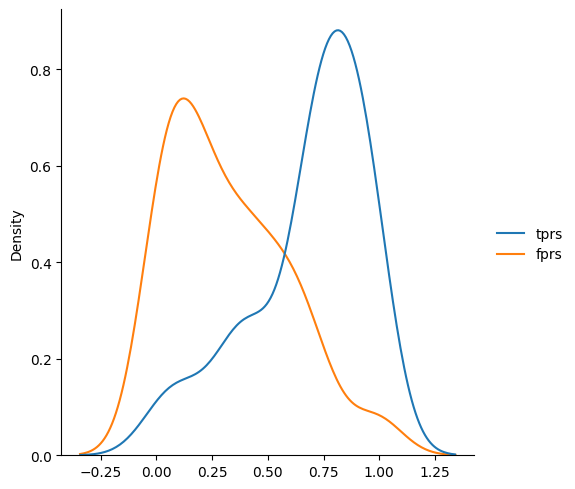

In [76]:
sns.displot(roc.iloc[:, [0,1]],kind = 'kde')
plt.show()

### 임계값 변화에 따른 정밀도와 재현율의 트레이드오프 관계
+ precision_recall_curve_plot : 정밀도와 재현율의 관계를 리스트로 출력

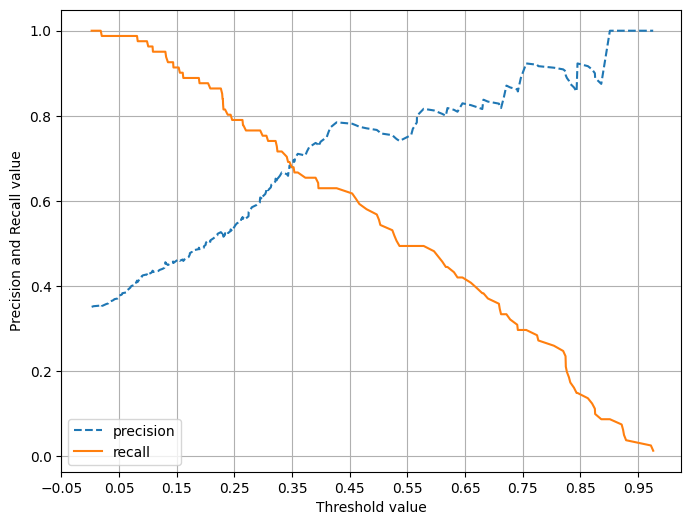

In [85]:
from sklearn.metrics import precision_recall_curve
import matplotlib.ticker as ticker

def precision_recall_curve_plot(Y_test, pred_proba_c1): 
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # 그래프 설정: x scale, x/y label, legend, grid
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()


precision_recall_curve_plot(Y_test, lrclf.predict_proba(X_test)[:, 1])

In [77]:
optidx = np.argmax(tprs - fprs)
thresholds[optidx]

0.42738301967489023

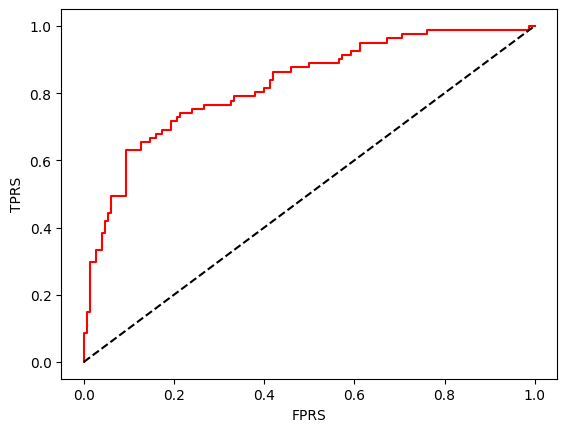

In [80]:
plt.plot(fprs, tprs,'r')
plt.plot([0,1],[0,1],'k--')

plt.xlabel('FPRS')
plt.ylabel('TPRS')

plt.show()

In [81]:
roc_auc_score(Y_test,pred)

0.731111111111111